In [2]:
# Car Price Prediction on Ford Dataset

import numpy as np
import pandas as pd

data = pd.read_csv('/content/ford.csv')

data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [3]:
data.shape # Almost 18000 rows, so can get very good results

(17966, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [5]:
data['engineSize'].unique()

array([1. , 1.5, 1.6, 1.2, 2. , 1.1, 2.3, 1.4, 5. , 2.2, 2.5, 1.8, 1.3,
       3.2, 0. , 1.7])

In [6]:
data['fuelType'].unique()

array(['Petrol', 'Diesel', 'Hybrid', 'Electric', 'Other'], dtype=object)

In [7]:
data['mileage'].unique()

array([15944,  9083, 12456, ..., 31348,  7010,  5007])

In [8]:
data['transmission'].unique()

array(['Automatic', 'Manual', 'Semi-Auto'], dtype=object)

In [9]:
data['tax'].unique()

array([150, 145,   0,  20, 160, 125,  30, 235, 240, 200, 165, 140, 570,
       205, 260, 580, 135, 265, 300, 195, 120, 555, 325, 155, 270, 115,
       110, 190, 210, 185, 330, 230, 220, 305, 290,  22])

In [10]:
data['model'].unique()

array([' Fiesta', ' Focus', ' Puma', ' Kuga', ' EcoSport', ' C-MAX',
       ' Mondeo', ' Ka+', ' Tourneo Custom', ' S-MAX', ' B-MAX', ' Edge',
       ' Tourneo Connect', ' Grand C-MAX', ' KA', ' Galaxy', ' Mustang',
       ' Grand Tourneo Connect', ' Fusion', ' Ranger', ' Streetka',
       ' Escort', ' Transit Tourneo', 'Focus'], dtype=object)

In [11]:
data['mpg'].unique()

array([ 57.7,  40.3,  48.7,  47.9,  50.4,  54.3,  42.2,  61.4,  56.5,
        65.7,  58.9,  64.2,  38.2,  62.8,  55.4,  41.5,  68.9,  78.5,
        60.1,  53.3,  39.2,  74.3,  43.5,  31.7,  57.6,  44.1,  49.6,
        76.4,  34.4,  44.8,  36.7,  67.3,  52.3,  51.4,  70.6,  46.3,
        45.6,  31. ,  74.4,  80.7,  47.1,  22.1,  30.7,  28.8,  23.5,
        56.6,  40.9,  29.1,  38.7,  22.6,  42.8,  30.1,  20.9,  88.3,
        34.5,  37.2,  35.3,  83.1,  37.7,  35.8,  40.4,  85.6,  32.5,
        20.8, 201.8,  34. ,  39.8,  24.8,  33.6,  32.8,  29.4,  31.4,
        22.8,  23.7,  32.1,  43.4,  34.9,  28.3,  27.4,  76.3,  30.4,
        36.2,  69. ,  26.3,  37.1,  28. ,  42.1,  54.2,  28.5,  23.9])

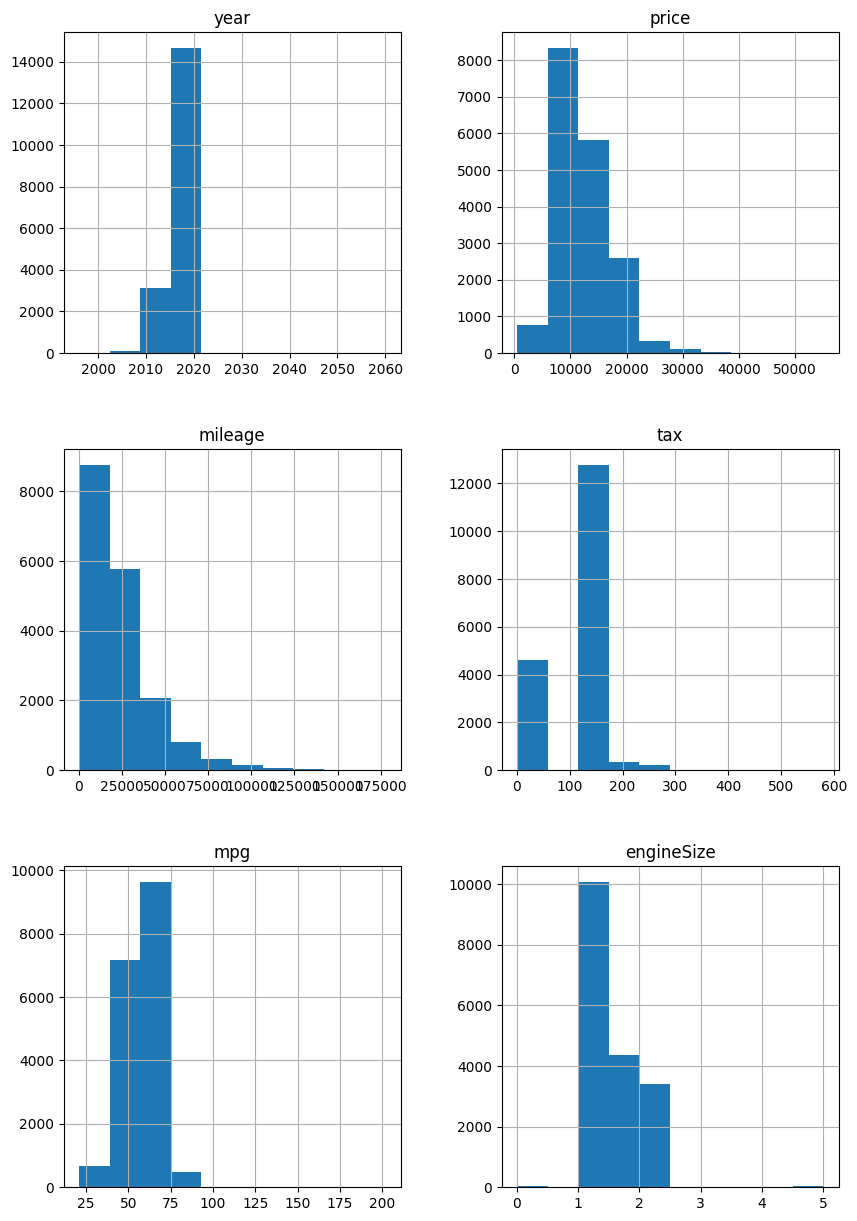

In [12]:
import matplotlib.pyplot as plt

data.hist(figsize = (10, 15))
plt.show()

In [13]:
data.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [ ]:
'''
OUTLIERS EXIST IN THE DATASET.
'''

In [14]:
data = data[data['year'] < 2060]
data.describe() # year column is normalized.

,year,price,mileage,tax,mpg,engineSize
count,17965.000000,17965.000000,17965.000000,17965.000000,17965.000000,17965.000000
mean,2016.864069,12279.856833,23360.858447,113.324353,57.907821,1.350804
std,2.024978,4741.279186,19471.182902,62.010410,10.125350,0.432379
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.000000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31048.000000,145.000000,65.700000,1.500000
max,2020.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


<Axes: xlabel='engineSize'>

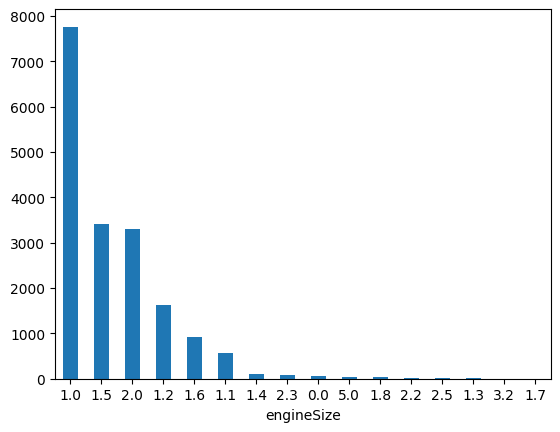

In [15]:
data['engineSize'].value_counts().plot.bar(rot=0) # 0 should be removed

In [16]:
data = data[data['engineSize'] > 0]
data.describe()

,year,price,mileage,tax,mpg,engineSize
count,17914.000000,17914.000000,17914.000000,17914.000000,17914.000000,17914.000000
mean,2016.862789,12281.289103,23371.591716,113.336887,57.910690,1.354650
std,2.026078,4743.641951,19475.576769,62.014507,10.127019,0.426936
min,1996.000000,495.000000,1.000000,0.000000,20.800000,1.000000
25%,2016.000000,8999.000000,9987.250000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18249.000000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31078.750000,145.000000,65.700000,1.500000
max,2020.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


<Axes: xlabel='tax'>

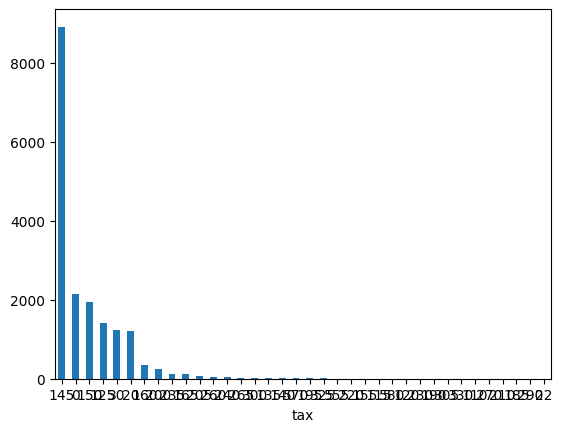

In [17]:
data['tax'].value_counts().plot.bar(rot=0)

In [18]:
data.shape # it has reduced

(17914, 9)

In [19]:
data.corr(numeric_only=True)['price'].sort_values() # year and engineSize have some linearity with price

,price
mileage,-0.530824
mpg,-0.346619
tax,0.407191
engineSize,0.416465
year,0.645780
price,1.000000


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder

X = data.drop(columns = ['price'])
Y = data['price']

ohe = OneHotEncoder(drop='first', sparse_output=False)
encoded = ohe.fit_transform(X[['model', 'transmission', 'fuelType']])

encoded_data = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(['model', 'transmission', 'fuelType']))

X = X.drop(columns=['model', 'transmission', 'fuelType']).reset_index(drop=True)
X = pd.concat([X, encoded_data], axis=1)

lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=100)

X

,year,mileage,tax,mpg,engineSize,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,model_ Fiesta,...,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,15944,150,57.7,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2018,9083,150,57.7,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,2017,12456,150,57.7,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,2019,10460,145,40.3,1.5,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,2019,1482,145,48.7,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17909,2017,16700,150,47.1,1.4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
17910,2014,40700,30,57.7,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
17911,2015,7010,20,67.3,1.6,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
17912,2018,5007,145,57.7,1.2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [21]:
def best_linear():

  scores = []

  for i in range(1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=i)
    lr.fit(X_train, Y_train)
    Y_pred = lr.predict(X_test)

    scores.append(r2_score(Y_test, Y_pred))

  return np.argmax(scores), scores[np.argmax(scores)], np.mean(scores)

In [22]:
def best_rf():

  scores = []

  for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=i)
    rf.fit(X_train, Y_train)
    Y_pred = rf.predict(X_test)

    scores.append(r2_score(Y_test, Y_pred))

  return np.argmax(scores), scores[np.argmax(scores)], np.mean(scores)

In [23]:
print("Linear Model Performance: [State, Best, Mean]: ", best_linear()) # Best Linear Model Performance:  (np.int64(523), 0.8686773538814977)
print("Random Forest Performance: [State, Best, Mean]: ", best_rf()) # Best Random Forest Performance:  (np.int64(2), 0.9320915864168567)

Linear Model Performance: [State, Best, Mean]:  (np.int64(523), 0.8686773538814977, np.float64(0.8493766905267994))
Random Forest Performance: [State, Best, Mean]:  (np.int64(9), 0.9314542343220064, np.float64(0.9260664172272787))


In [ ]:
'''
Brute-forcing to get the best R2_Score is finding the best results for a specific slice of data, and not the generalized data.
Instead, use the average R_2 score.

Avg. for Linear Model: 0.8493766905267994
Avg. for Random Forest: 0.9260664172272787

Random Forest performs better than Linear Model.
'''